<a href="https://colab.research.google.com/github/rani-sikdar/GenAI-complete-course-codes/blob/main/named_entity_recognition(ner)_in_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk # Download necessary resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

In [ ]:
pip install -q svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00


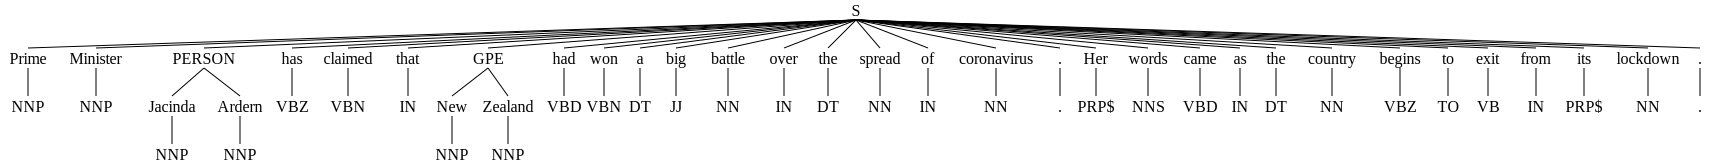

In [ ]:
#@title NER using NLTK

import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from textblob import TextBlob


sentence ="""Prime Minister Jacinda Ardern has claimed that New Zealand had won a big
battle over the spread of coronavirus. Her words came as the country begins to exit from its lockdown.

"""
# Tokenize and POS tag
tokens = word_tokenize(str(sentence))
pos_tags = pos_tag(tokens)

ne_tree = nltk.ne_chunk(pos_tags,binary=False)
ne_tree

In [ ]:
# tested with spacy==3.5.0
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp('Find the bottle which has the label "drink me".')

with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[7:11], attrs={"POS": "NOUN"})

In [ ]:
#@title Install required packages
pip install -q spacy

In [ ]:
!python -m spacy download en_core_web_sm  # Loading the English model

In [ ]:
import spacy

nlp= spacy.load("en_core_web_sm")

ner_categories = ["PERSON", "ORG", "GPE", "PRODUCT", "DATE"]

In [ ]:
text ="""
On 15th August 2023, Prime Minister Narendra Modi addressed the nation from the Red Fort in New Delhi, highlighting initiatives by the Ministry of Education and the Indian Space Research Organisation (ISRO). He congratulated the Chandrayaan-3 team for their successful lunar mission. The event was attended by Chief Minister Arvind Kejriwal, representatives from Tata Consultancy Services (TCS), and delegates from the United Nations. Earlier that week, Elon Musk visited Bengaluru to discuss electric vehicle projects with officials from the Government of Karnataka. The G20 Summit, scheduled for September 2023 in New Delhi, is expected to see participation from leaders like Joe Biden, Rishi Sunak, and Emmanuel Macron.
"""
doc= nlp(text)

In [ ]:
doc


On 15th August 2023, Prime Minister Narendra Modi addressed the nation from the Red Fort in New Delhi, highlighting initiatives by the Ministry of Education and the Indian Space Research Organisation (ISRO). He congratulated the Chandrayaan-3 team for their successful lunar mission. The event was attended by Chief Minister Arvind Kejriwal, representatives from Tata Consultancy Services (TCS), and delegates from the United Nations. Earlier that week, Elon Musk visited Bengaluru to discuss electric vehicle projects with officials from the Government of Karnataka. The G20 Summit, scheduled for September 2023 in New Delhi, is expected to see participation from leaders like Joe Biden, Rishi Sunak, and Emmanuel Macron.

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
#@title Identifying and Classifying Named Entities

entities =[]
for ent in doc.ents:
  # print(ent.label_)
  if ent.label_ in ner_categories:
    entities.append((ent.text, ent.label_))
entities


[('15th August 2023', 'DATE'),
 ('Narendra Modi', 'PERSON'),
 ('New Delhi', 'GPE'),
 ('the Ministry of Education', 'ORG'),
 ('the Indian Space Research Organisation', 'ORG'),
 ('Arvind Kejriwal', 'PERSON'),
 ('Tata Consultancy Services', 'ORG'),
 ('TCS', 'ORG'),
 ('the United Nations', 'ORG'),
 ('Earlier that week', 'DATE'),
 ('Elon Musk', 'PERSON'),
 ('Bengaluru', 'GPE'),
 ('the Government of Karnataka', 'ORG'),
 ('The G20 Summit', 'ORG'),
 ('September 2023', 'DATE'),
 ('New Delhi', 'GPE'),
 ('Joe Biden', 'PERSON'),
 ('Rishi Sunak', 'PERSON'),
 ('Emmanuel Macron', 'PERSON')]

In [ ]:
for entity, category in entities:
  print(entity,"-->", category)

15th August 2023 --> DATE
Narendra Modi --> PERSON
New Delhi --> GPE
the Ministry of Education --> ORG
the Indian Space Research Organisation --> ORG
Arvind Kejriwal --> PERSON
Tata Consultancy Services --> ORG
TCS --> ORG
the United Nations --> ORG
Earlier that week --> DATE
Elon Musk --> PERSON
Bengaluru --> GPE
the Government of Karnataka --> ORG
The G20 Summit --> ORG
September 2023 --> DATE
New Delhi --> GPE
Joe Biden --> PERSON
Rishi Sunak --> PERSON
Emmanuel Macron --> PERSON


In [ ]:
for ent in doc.ents:
    print(f"{ent.text:<25} | {ent.label_:<10} | {spacy.explain(ent.label_)}")

15th August 2023          | DATE       | Absolute or relative dates or periods
Narendra Modi             | PERSON     | People, including fictional
the Red Fort              | LOC        | Non-GPE locations, mountain ranges, bodies of water
New Delhi                 | GPE        | Countries, cities, states
the Ministry of Education | ORG        | Companies, agencies, institutions, etc.
the Indian Space Research Organisation | ORG        | Companies, agencies, institutions, etc.
Arvind Kejriwal           | PERSON     | People, including fictional
Tata Consultancy Services | ORG        | Companies, agencies, institutions, etc.
TCS                       | ORG        | Companies, agencies, institutions, etc.
the United Nations        | ORG        | Companies, agencies, institutions, etc.
Earlier that week         | DATE       | Absolute or relative dates or periods
Elon Musk                 | PERSON     | People, including fictional
Bengaluru                 | GPE        | Countries, citie

In [ ]:
spacy.displacy.render(doc , style = "ent")

In [ ]:
import pandas as pd

entities_ = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities_, columns=['text', 'type', 'lemma'])
df.head()

,text,type,lemma
0,15th August 2023,DATE,15th August 2023
1,Narendra Modi,PERSON,Narendra Modi
2,the Red Fort,LOC,the Red Fort
3,New Delhi,GPE,New Delhi
4,the Ministry of Education,ORG,the Ministry of Education


In [ ]:
#@title Entity Counts by Type
from collections import Counter

entity_counts = Counter([ent.label_ for ent in doc.ents])
print(entity_counts)


Counter({'ORG': 7, 'PERSON': 6, 'DATE': 3, 'GPE': 3, 'LOC': 1})


In [ ]:
#@title Unique Entity List per Category
from collections import defaultdict

entities_by_type = defaultdict(set)
for ent in doc.ents:
    entities_by_type[ent.label_].add(ent.text)

for label, ents in entities_by_type.items():
    print(f"{label}: {ents}")


DATE: {'15th August 2023', 'September 2023', 'Earlier that week'}
PERSON: {'Emmanuel Macron', 'Arvind Kejriwal', 'Rishi Sunak', 'Elon Musk', 'Narendra Modi', 'Joe Biden'}
LOC: {'the Red Fort'}
GPE: {'Bengaluru', 'New Delhi'}
ORG: {'the Government of Karnataka', 'TCS', 'The G20 Summit', 'the United Nations', 'Tata Consultancy Services', 'the Ministry of Education', 'the Indian Space Research Organisation'}


In [ ]:
#@title Co-occurrence of Entities
for sent in doc.sents:
    ents = [ent.text for ent in sent.ents]
    if len(ents) > 1:
        print(f"Sentence: {sent.text.strip()}")
        print(f"Entities: {ents}\n")


Sentence: On 15th August 2023, Prime Minister Narendra Modi addressed the nation from the Red Fort in New Delhi, highlighting initiatives by the Ministry of Education and the Indian Space Research Organisation (ISRO).
Entities: ['15th August 2023', 'Narendra Modi', 'the Red Fort', 'New Delhi', 'the Ministry of Education', 'the Indian Space Research Organisation']

Sentence: The event was attended by Chief Minister Arvind Kejriwal, representatives from Tata Consultancy Services (TCS), and delegates from the United Nations.
Entities: ['Arvind Kejriwal', 'Tata Consultancy Services', 'TCS', 'the United Nations']

Sentence: Earlier that week, Elon Musk visited Bengaluru to discuss electric vehicle projects with officials from the Government of Karnataka.
Entities: ['Earlier that week', 'Elon Musk', 'Bengaluru', 'the Government of Karnataka']

Sentence: The G20 Summit, scheduled for September 2023 in New Delhi, is expected to see participation from leaders like Joe Biden, Rishi Sunak, and Em

In [ ]:
from spacy import displacy

# Render inline in Jupyter Notebook
displacy.render(doc, style="ent", jupyter=True)


In [ ]:
pip install -q seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score

true_labels = [["B-ORG", "I-ORG", "O", "B-MONEY", "O"]]
pred_labels = [["B-ORG", "I-ORG", "O", "B-MONEY", "O"]]

print("Precision:", precision_score(true_labels, pred_labels))
print("Recall:", recall_score(true_labels, pred_labels))
print("F1-score:", f1_score(true_labels, pred_labels))


Precision: 1.0
Recall: 1.0
F1-score: 1.0
